# Statoil/C-CORE Iceberg Classifier Challenge
## Ship or iceberg, can you decide from space?

# Abstract

<p>Drifting icebergs present threats to navigation and activities in areas such as offshore of the East Coast of Canada.</p>

<p>Currently, many institutions and companies use aerial reconnaissance and shore-based support to monitor environmental conditions and assess risks from icebergs. However, in remote areas with particularly harsh weather, these methods are not feasible, and the only viable monitoring option is via satellite.</p>

<p>Statoil, an international energy company operating worldwide, has worked closely with companies like C-CORE. C-CORE have been using satellite data for over 30 years and have built a computer vision based surveillance system. To keep operations safe and efficient, Statoil is interested in getting a fresh new perspective on how to use machine learning to more accurately detect and discriminate against threatening icebergs as early as possible.</p>

<p>In this competition, you’re challenged to build an algorithm that automatically identifies if a remotely sensed target is a ship or iceberg. Improvements made will help drive the costs down for maintaining safe working conditions.</p>

https://www.kaggle.com/c/statoil-iceberg-classifier-challenge

# prepare the Data

In [1]:
%pylab
%matplotlib inline  
import pandas as pd
from subprocess import check_output  # For checking the path of the Test and Train folders

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [5]:
# Checking the path for the Test and Train folders
print(check_output(["ls", "../../data_iceberge/"]).decode("utf8"))

# Load the data from local machine
train = pd.read_json("../../data_iceberge/Train/train.json")
test  = pd.read_json("../../data_iceberge/Test/test.json")

Test
Train
sample_submission



In [10]:
print('shape for the Train data: {0}'.format(train.shape))
train.head(5)

shape for the Train data: (1604, 5)


,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878361, -27.15416, -28.668615, -29.537971...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920305, -14.920363, -12.66633...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [9]:
print('shape for the Test data: {0}'.format(test.shape))
test.head(5)

shape for Test data: (8424, 4)


,band_1,band_2,id,inc_angle
0,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",5941774d,34.966400
1,"[-26.0589694977, -26.0589694977, -26.058969497...","[-25.7542076111, -25.7542076111, -25.754207611...",4023181e,32.615072
2,"[-14.1410999298, -15.0642414093, -17.375520706...","[-14.745639801, -14.5904102325, -14.3626976013...",b20200e4,37.505433
3,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",e7f018bb,34.473900
4,"[-23.3745937347, -26.0271816254, -28.121963501...","[-25.7223434448, -27.0115776062, -23.149162292...",4371c8c3,43.918874


In [11]:
print('**inc_angle in train data:**')
print(train.inc_angle.value_counts().head(5))

print('\n**inc_angle in test data:**')
print(test.inc_angle.value_counts().head(5))
#train[train.inc_angle == 'na'] = np.nan

**inc_angle in train data:**
na         133
34.4721     23
42.5591     16
36.1061     15
33.6352     15
Name: inc_angle, dtype: int64

**inc_angle in test data:**
34.4721    36
42.5591    34
39.9784    33
33.6352    31
33.6350    28
Name: inc_angle, dtype: int64


In [12]:
print('Train data --> band_1: {0} \t band_2: {1}'
      .format((len(train.band_1[0]), len(train.band_1)), (len(train.band_2[0]), len(train.band_2))))

print('Test data  --> band_1: {0} \t band_2: {1}'
      .format((len(test.band_1[0]), len(test.band_1)), (len(test.band_2[0]), len(test.band_2))))

Train data --> band_1: (5625, 1604) 	 band_2: (5625, 1604)
Test data  --> band_1: (5625, 8424) 	 band_2: (5625, 8424)


In [13]:
def plot_images(images, message, title = ''):
    '''This function plots 9, 2D inferno images in a 3x3 grid,
       and the shape of (75, 75)'''
    assert len(images) == 9;   # Check the input for holding only 9 images
    img_shape = (75, 75);      # Shape of the images
    
    # Create figure with 15x15 sub-plots.
    fig, axes = plt.subplots(3, 3, figsize = (15, 15))
    fig.suptitle(message, fontsize = 20)
    
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(np.reshape(np.array(images.iloc[i]), img_shape), cmap ='inferno')
        ax.set_title(title)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

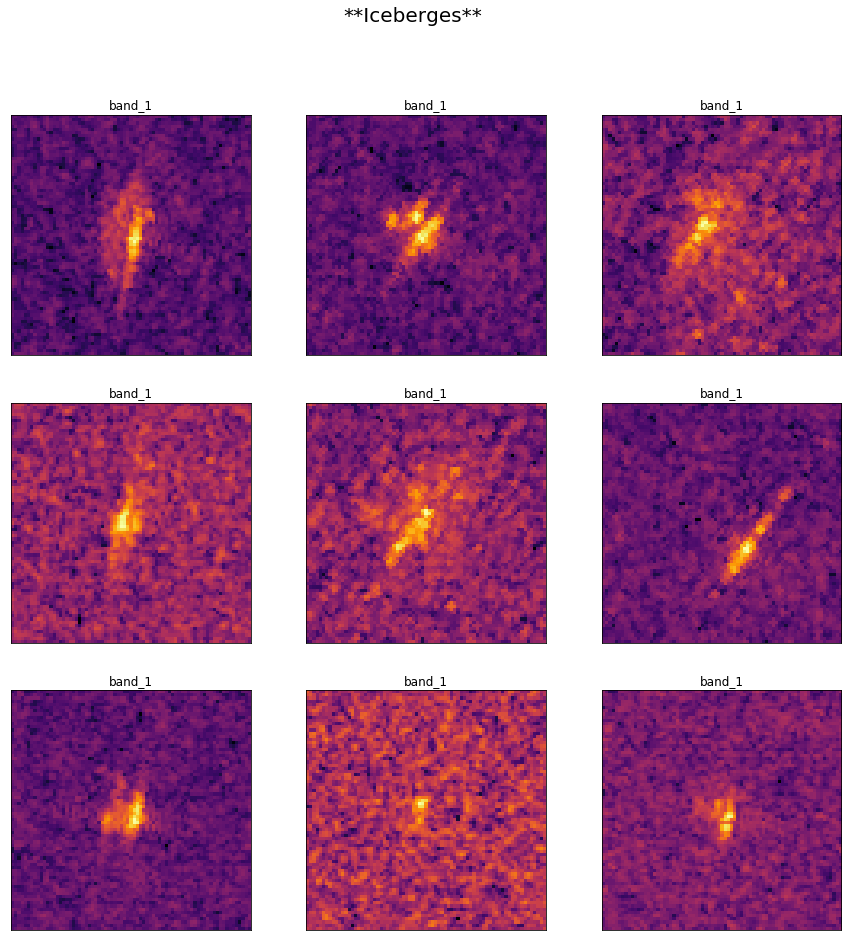

In [14]:
icebergs = train[train.is_iceberg == 1].sample(n = 9, random_state = 12).band_1  # only band1
plot_images(icebergs, '**Iceberges**', 'band_1')

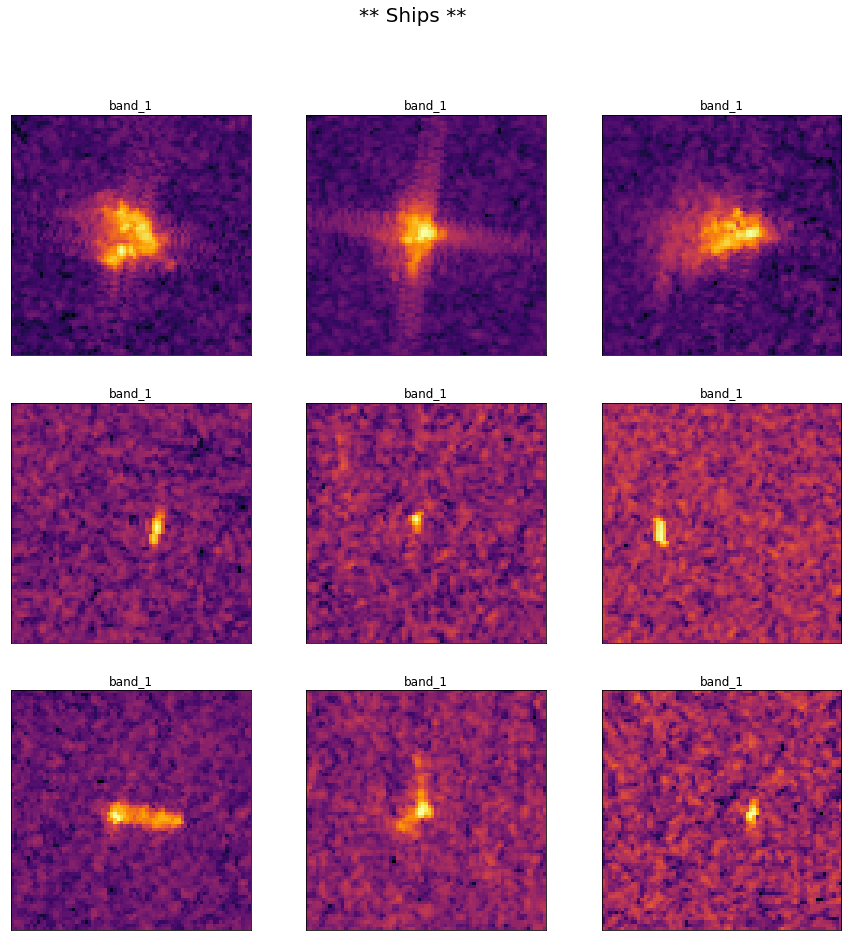

In [15]:
ships = train[train.is_iceberg == 0].sample(n = 9, random_state = 21).band_1 # only band_1
plot_images(ships, '** Ships **', 'band_1')

https://www.kaggle.com/devm2024/keras-model-for-beginners-0-210-on-lb-eda-r-d

https://www.kaggle.com/wvadim/keras-tf-lb-0-18

https://github.com/magicmonty/bash-git-prompt